In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import json 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Load the dataset
data = pd.read_csv("creditcard.csv")

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
';'.join(data.columns.to_list())

'Time;V1;V2;V3;V4;V5;V6;V7;V8;V9;V10;V11;V12;V13;V14;V15;V16;V17;V18;V19;V20;V21;V22;V23;V24;V25;V26;V27;V28;Amount;Class'

In [6]:
data[['Amount','Time','Class']].head(5)

,Amount,Time,Class
0,149.62,0.0,0
1,2.69,0.0,0
2,378.66,1.0,0
3,123.50,1.0,0
4,69.99,2.0,0


In [7]:
# Data preprocessing
# Standardize the 'Amount' column
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [8]:
data[['Amount','Time','Class']].head(5)

,Amount,Time,Class
0,0.244964,0.0,0
1,-0.342475,0.0,0
2,1.160686,1.0,0
3,0.140534,1.0,0
4,-0.073403,2.0,0


In [9]:
# Split the data into features and labels
X = data.drop(['Time', 'Class'], axis=1)
y = data['Class']

In [10]:
X.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [11]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# EDA 

## Imbalance 

/Users/monu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

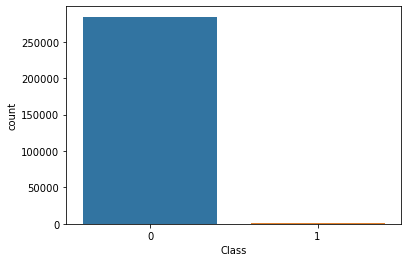

In [15]:
import seaborn as sns
sns.countplot("Class", data=data)

As you can see, there is an imbalance betweenthe fraud and non-fraud transaction i.e  the non-fraud transactions are more than the fraud transactions. If we train a binary classification model without fixing this problem, the model will be completely biased i.e mostly non-fraud. It also impacts the correlations between features. So we can do using pycaret with imbalance is set to True or we fix using one of the way SMOTE 

SMOTE (Synthetic Minority Oversampling Technique) – Oversampling: SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

## Correlation 

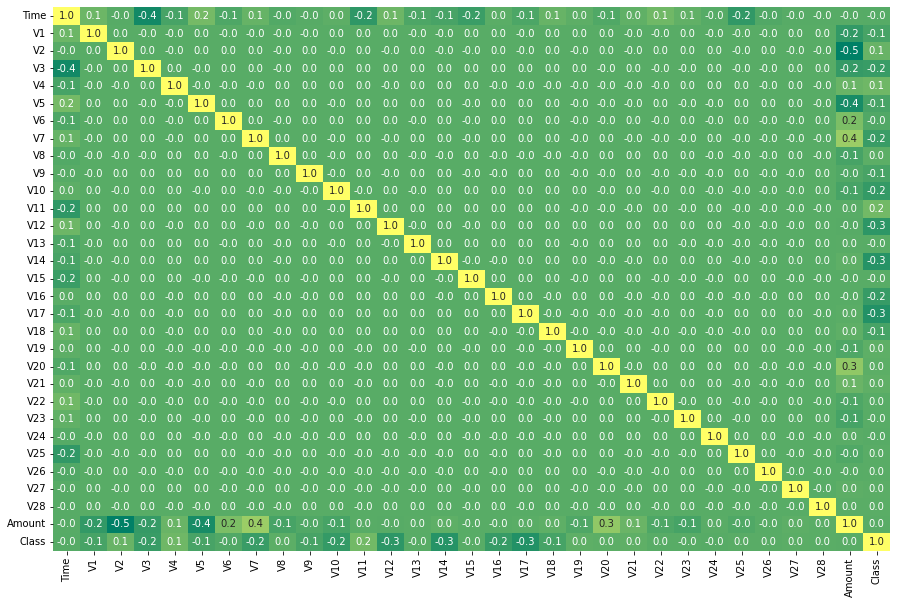

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cbar=False, fmt='.1f', cmap='summer')
plt.show()

You can see the correlation above 

## Outlier

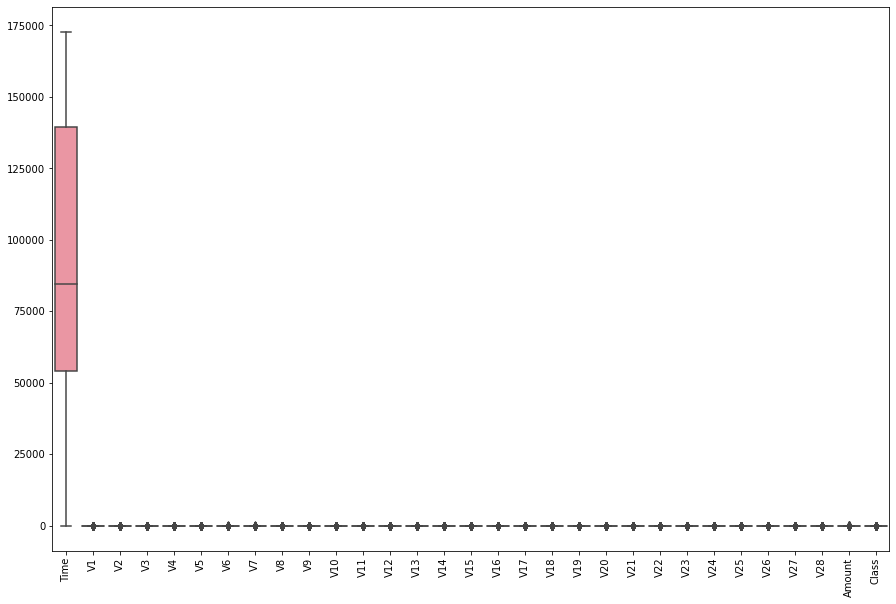

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


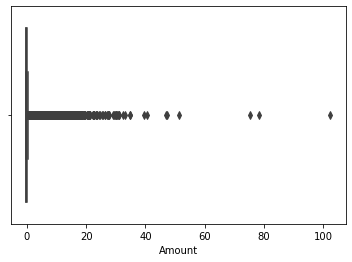

In [23]:
plt.tight_layout()
sns.boxplot(x=data['Amount'], data=data)
plt.show()

# Manual Training  and Hyper Tuning


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 29)
Number transactions y_train dataset:  (227845,)
Number transactions X_test dataset:  (56962, 29)
Number transactions y_test dataset:  (56962,)


## Helper Function for manual Testing 

We will fix the imbalance and then we create a helper function and pass to automatically tune and do. In normal case we can use the pycaret 



In [29]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, the shape of train_X: (227845, 29)
Before OverSampling, the shape of train_y: (227845,) 

Before OverSampling, counts of label '1': 394
Before OverSampling, counts of label '0': 227451 



In [30]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [31]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


After OverSampling, the shape of train_X: (454902, 29)
After OverSampling, the shape of train_y: (454902,) 

After OverSampling, counts of label '1': 227451
After OverSampling, counts of label '0': 227451


You can see we managed the imbalance using SMOTE 

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def test_classification_model(model, X, y, test_size=0.2, random_state=42, hyperparameters=None):
    """
    Test a classification model and return evaluation metrics.

    Parameters:
    - model: The classification model to test (e.g., RandomForestClassifier, LogisticRegression, etc.).
    - X: The feature matrix.
    - y: The target vector.
    - test_size: The proportion of the dataset to include in the test split (default is 0.2).
    - random_state: Seed for random number generator for reproducibility (default is 42).
    - hyperparameters: Dictionary of hyperparameters for model tuning (default is None).

    Returns:
    - Dictionary containing the evaluation metrics: accuracy, precision, recall, F1 score, and confusion matrix.
    """
    print("Processing for the Model : {} ".format(model))
    # Split the dataset into training and testing sets
    print("Splitting train and test for the Model : {} ".format(model))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    print("Configuring hyper parameter  for the Model : {}  with hyperparamer {}".format(model,json.dumps(hyperparameters,indent=4)))
    if hyperparameters is not None:
        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, hyperparameters, cv=5,verbose=2)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    print("Fitting the Model : {} ".format(model))
    # Fit the model to the training data
    model.fit(X_train, y_train)

    print("Predicting  the Model : {} ".format(model))
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store the metrics in a dictionary
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion
    }

    return metrics

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define the models to test with Hyperparameter 
models = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [10, 50, 100],
        'max_depth': [ 10]
    }),
    'Logistic Regression': (LogisticRegression(), {
        'C': [0.1, 1]
    })
}

# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Test each model and store the metrics in the DataFrame
for model_name, (model, hyperparameters) in models.items():
    metrics = test_classification_model(model, X_train_res, y_train_res, hyperparameters=hyperparameters)
    metrics_df = metrics_df.append({'Model': model_name, **metrics}, ignore_index=True)

# Display the metrics DataFrame
display(metrics_df)

Processing for the Model : RandomForestClassifier() 
Splitting train and test for the Model : RandomForestClassifier() 
Configuring hyper parameter  for the Model : RandomForestClassifier()  with hyperparamer {
    "n_estimators": [
        10,
        50,
        100
    ],
    "max_depth": [
        10
    ]
}
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ......................max_depth=10, n_estimators=10; total time=  13.2s
[CV] END ......................max_depth=10, n_estimators=10; total time=  13.1s
[CV] END ......................max_depth=10, n_estimators=10; total time=  13.3s
[CV] END ......................max_depth=10, n_estimators=10; total time=  13.3s
[CV] END ......................max_depth=10, n_estimators=10; total time=  13.4s
[CV] END ......................max_depth=10, n_estimators=50; total time= 1.1min
[CV] END ......................max_depth=10, n_estimators=50; total time= 1.1min
[CV] END ......................max_depth=10, n_estimators=5

/Users/monu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................................C=1; total time=   2.8s


/Users/monu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................................C=1; total time=   2.9s
[CV] END ................................................C=1; total time=   2.4s
[CV] END ................................................C=1; total time=   2.4s
[CV] END ................................................C=1; total time=   2.6s


/Users/monu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting the Model : LogisticRegression(C=1) 
Predicting  the Model : LogisticRegression(C=1) 


/Users/monu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Random Forest,0.987844,0.998007,0.977689,0.987744,"[[45309, 89], [1017, 44566]]"
1,Logistic Regression,0.945670,0.975033,0.914990,0.944058,"[[44330, 1068], [3875, 41708]]"


In [37]:
display(metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Random Forest,0.987844,0.998007,0.977689,0.987744,"[[45309, 89], [1017, 44566]]"
1,Logistic Regression,0.945670,0.975033,0.914990,0.944058,"[[44330, 1068], [3875, 41708]]"


# Using Pycaret

PyCaret is not just a model evaluation tool; it's a comprehensive machine learning automation and workflow management library. While model evaluation is a significant part of its functionality, PyCaret also helps with various other aspects of the machine learning process, including data preprocessing, model training, hyperparameter tuning, ensemble model building, model interpretation, and deployment. It simplifies the end-to-end machine learning workflow, making it easier to perform a wide range of tasks beyond just model evaluation.

In [41]:
# Initialize PyCaret setup
from pycaret.classification import *
exp1 = setup(data, target='Class', fix_imbalance=True, imputation_type='iterative', session_id=123,)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 30)"
4,Transformed data shape,"(483483, 30)"
5,Transformed train set shape,"(398040, 30)"
6,Transformed test set shape,"(85443, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,iterative


In [ ]:
# Compare models and select the best
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:14:54
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9775,0.9808,0.9158,0.0659,0.1230,0.1202,0.2424,2.0050


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model(best_model)

In [ ]:
final_model = finalize_model(tuned_model)

In [ ]:
save_model(final_model, 'my_model')

In [ ]:
# Make predictions on the test set
y_pred = predict_model(final_model, data=X_test)

In [ ]:
y_pred

In [ ]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred['prediction_label'])
accuracy = accuracy_score(y_test, y_pred['prediction_label'])
class_report = classification_report(y_test, y_pred['prediction_label'])

Precision (also known as Positive Predictive Value)
Recall (also known as True Positive Rate or Sensitivity)
F1-Score (the harmonic mean of precision and recall)
Support (the number of occurrences of each class in the true labels)
Additionally, the classification report provides overall metrics, including:

Accuracy (the proportion of correctly classified instances)
Macro-averaged metrics (averages of precision, recall, and F1-score calculated for each class independently, and then averaged)
Weighted-averaged metrics (averages of precision, recall, and F1-score calculated for each class independently, weighted by the number of occurrences of each class)
These metrics offer a comprehensive assessment of the model's performance in a multi-class classification scenario.



In [ ]:
from sklearn.metrics import classification_report

# Assuming you have ground truth labels (y_true) and predicted labels (y_pred)
# y_true is your true class labels
# y_pred is the predicted class labels from your model

# Calculate classification metrics
report = classification_report(y_test, y_pred['prediction_label'])

# Print the classification report
print(report)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

In [ ]:
# Visualize the confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['Legitimate', 'Fraud']
plot_confusion_matrix(conf_matrix, labels)
plt.show()